# Data Analysis Report: Comparing Dog and Cat Breeds

## By Cecilia Pisano 
### Instructor Sandeep More

## Purpose of the Analysis
The goal of this analysis is to explore both the physical and behavioral differences between dog and cat breeds using data from TheDogAPI and TheCatAPI. This project is made by four main questions of interest.
1. *How does average weight differ across breeds and between species?*
2. *How does average lifespan differ across breeds and species?*
3. *What is the relationship between weight and lifespan within species?*
4. *Which temperament traits are the most common in dogs and cats?*
   
These questions help turn the API data into insights about the trends between the two species.

## My Method and Data Source for Starting

The analysis is based off of two publicly avaible datasets sourced from TheDogAPI and TheCatAPI. Each dataset provides structued breed information including weight ranges, lifespan ranges and temperament descriptions. These sources are valuable to this analysis as they compline standardized breed charactersites widely used by veterinarians, breeders and the public.

The structure of the data is organized as tables where each row represents a breed. Key pieces of information include:
* Weight: often given as a string range (e.g., "10 - 20") in kilograms.
* Lifespan: often given as a string range (e.g., "12 - 15 years").
* Temperament: a comma-separated string describing behavioral traits.
* For this analysis, I focused on the average weight, average lifespan, and the frequency of temperament traits for each species.

Using Python, pandas, and matplotlib, I conducted analyses including boxplots to compare weight and lifespan across species, scatterplots to examine the relationship between weight and lifespan within species, and bar charts to visualize the most common temperament traits. The data is required to be cleaned to ensure consistently throughout the project. Weight and lifespan are examples of stored text ranges, so cleaning is required to get a numeric average for accurray and better reading. Temperament data is needed to be split comma separated strings into indivudal traits. Cleaned datasets used are dogs_clean and cats_clean; these formed the foundation for all the anlyses and visualization used for this project.

## Physical Differences across species: Weight and Lifepspan.
Examining how average weight differs between dog and cat breed. By converting the weight ranges to numeric averages, specie level differences were formed in response. Dog breeds show lots of weight variability (small dogs to larger dogs), while cats are more clustered in weight, in comparison to dogs.

In [52]:
import pandas as pd
import requests
import re
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

dog_url = "https://api.thedogapi.com/v1/breeds"
cat_url = "https://api.thecatapi.com/v1/breeds"

In [53]:
dogs_response = requests.get(dog_url)
cats_response = requests.get(cat_url)

dogs_data = dogs_response.json()
cats_data = cats_response.json()

dogs_df = pd.DataFrame(dogs_data)
cats_df = pd.DataFrame(cats_data)

In [54]:
def extract_numbers(s):
    """Extract numbers from string"""
    if not isinstance(s, str):
        return []
    nums = re.findall(r"[-+]?\d*\.?\d+", s)
    return [float(n) for n in nums]

def parse_range(cell):
    """Compute average from range string or dict"""
    if isinstance(cell, dict):
        val = cell.get("metric") or cell.get("imperial") or ""
        return parse_range(val)
    if isinstance(cell, str):
        nums = extract_numbers(cell)
        if len(nums) == 0:
            return np.nan
        return np.mean(nums)
    if isinstance(cell, (int, float)):
        return float(cell)
    return np.nan

def extract_traits(series):
    """Flatten temperament column into list of traits"""
    traits = []
    for val in series.dropna():
        if isinstance(val, str):
            traits.extend([t.strip() for t in val.split(",")])
        elif isinstance(val, list):
            traits.extend(val)
    return traits

In [55]:
dogs_df['avg_weight'] = dogs_df['weight'].apply(parse_range)
dogs_df['avg_lifespan'] = dogs_df['life_span'].apply(parse_range)
dog_traits = extract_traits(dogs_df['temperament'])

cats_df['avg_weight'] = cats_df['weight'].apply(parse_range)
cats_df['avg_lifespan'] = cats_df['life_span'].apply(parse_range)
cat_traits = extract_traits(cats_df['temperament'])

In [56]:
dog_counts = Counter(dog_traits).most_common(10)
dog_labels, dog_values = zip(*dog_counts)

cat_counts = Counter(cat_traits).most_common(10)
cat_labels, cat_values = zip(*cat_counts)

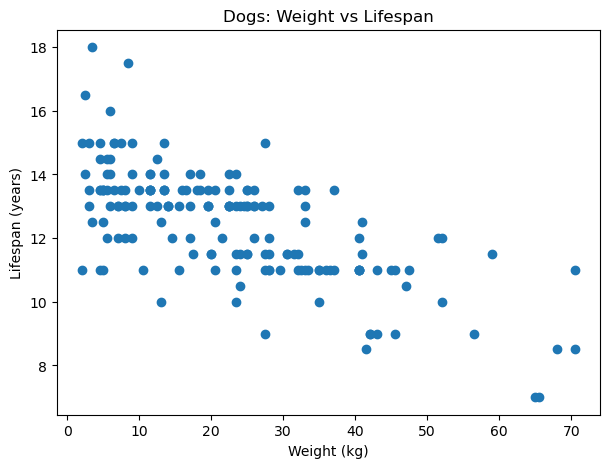

In [57]:
plt.figure(figsize=(7,5))
plt.scatter(dogs_df['avg_weight'], dogs_df['avg_lifespan'])
plt.xlabel("Weight (kg)")
plt.ylabel("Lifespan (years)")
plt.title("Dogs: Weight vs Lifespan")
plt.show()

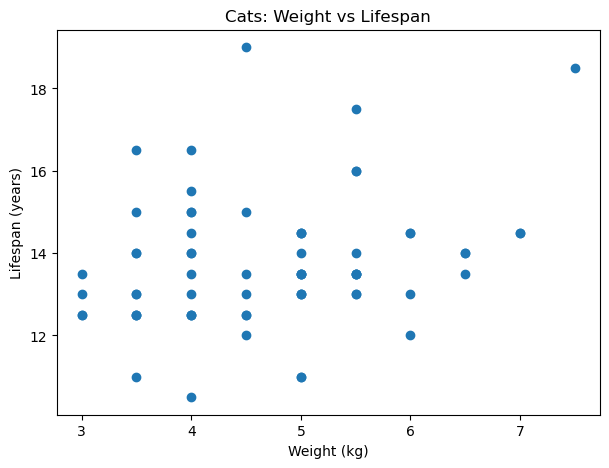

In [58]:
plt.figure(figsize=(7,5))
plt.scatter(cats_df['avg_weight'], cats_df['avg_lifespan'])
plt.xlabel("Weight (kg)")
plt.ylabel("Lifespan (years)")
plt.title("Cats: Weight vs Lifespan")
plt.show()

/var/folders/bw/ldq3npf55sb4xp16542fk9kr0000gn/T/ipykernel_33130/2898763365.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([dogs_df['avg_weight'].dropna(), cats_df['avg_weight'].dropna()],


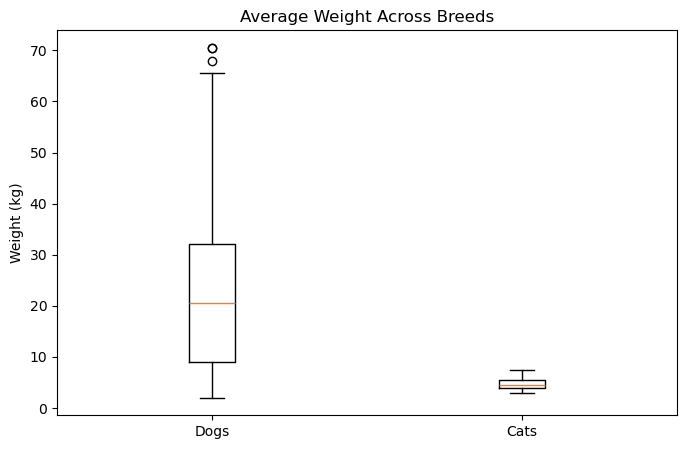

In [59]:
plt.figure(figsize=(8,5))
plt.boxplot([dogs_df['avg_weight'].dropna(), cats_df['avg_weight'].dropna()],
            labels=["Dogs","Cats"])
plt.ylabel("Weight (kg)")
plt.title("Average Weight Across Breeds")
plt.show()

As shown, dogs display much greater variability in weight than cats. 
Some dog breeds are extremely small while others are very large, whereas cat breeds are more uniform.


/var/folders/bw/ldq3npf55sb4xp16542fk9kr0000gn/T/ipykernel_33130/3631532632.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([dogs_df['avg_lifespan'].dropna(), cats_df['avg_lifespan'].dropna()],


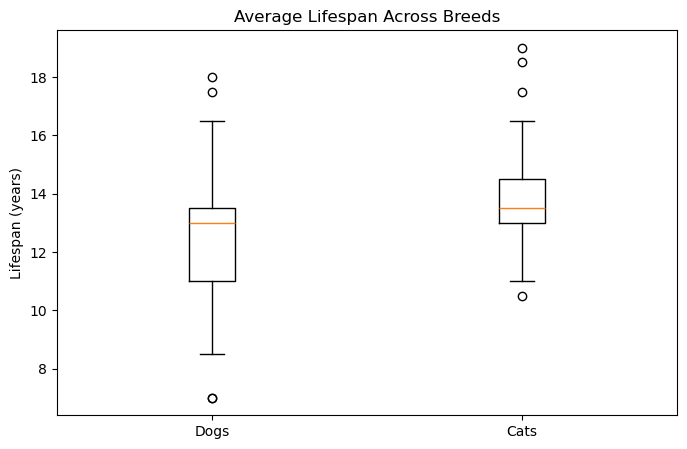

In [60]:
plt.figure(figsize=(8,5))
plt.boxplot([dogs_df['avg_lifespan'].dropna(), cats_df['avg_lifespan'].dropna()],
            labels=["Dogs","Cats"])
plt.ylabel("Lifespan (years)")
plt.title("Average Lifespan Across Breeds")
plt.show()

Dogs show more variation in lifespan, generally correlated with size. Cats tend to live longer and more consistently across breeds.


The results indicate several distinct patterns. Dogs demonstrate significantly greater weight variation than cats, ranging from small terriers to giant breeds, and this size variability is associated with lifespan; heavier breeds typically have shorter lifespans. In contrast, cats exhibit more uniform weights and longer lifespans, with no evident correlation between weight and lifespan. Temperament analysis shows that dog breeds are frequently characterized as socially oriented, such as friendly or energetic, whereas cat breeds are more often described as independent or intelligent. These findings indicate that artificial selection in dogs has led to greater morphological and behavioral diversity, whereas cats have remained more biologically constrained. Study limitations include reliance on estimated or reported breed averages, potential bias in temperament descriptions, and incomplete data for certain breeds.

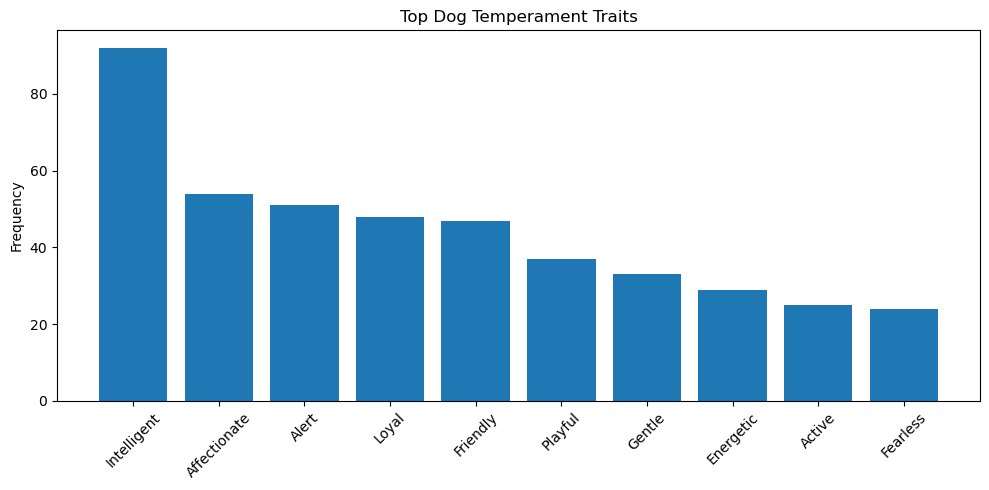

In [50]:
plt.figure(figsize=(10,5))
plt.bar(dog_labels, dog_values)
plt.title("Top Dog Temperament Traits")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Dog breeds are frequently described as friendly, energetic, loyal, and affectionate, showing human-oriented behavioral traits.

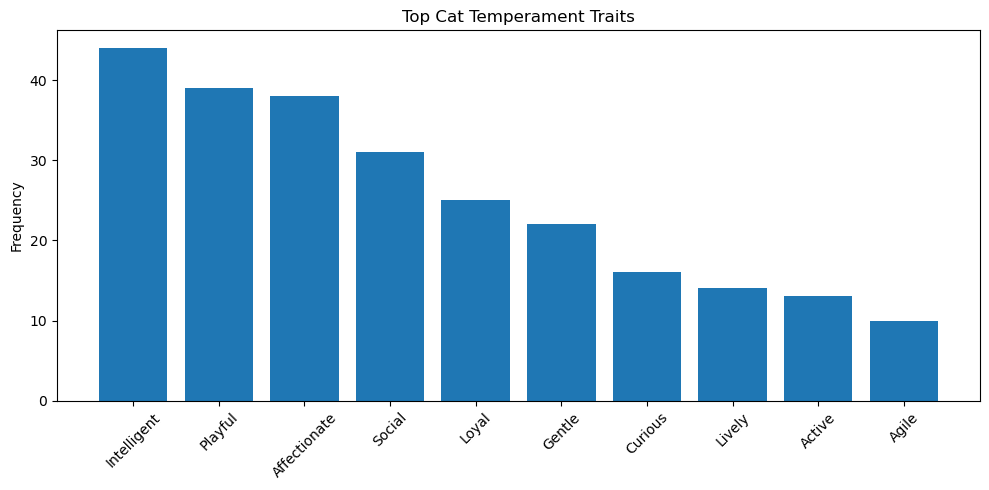

In [51]:
plt.figure(figsize=(10,5))
plt.bar(cat_labels, cat_values)
plt.title("Top Cat Temperament Traits")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Cat breeds are often described as intelligent, independent, playful, and affectionate, reflecting a more uniform behavioral profile.

In summary, this analysis demonstrates that dogs and cats differ not only in size and lifespan patterns but also in the diversity of temperament traits. Dogs display considerable variability, with weight influencing lifespan, whereas cats are more consistent across breeds. These findings underscore that domestication and selective breeding have shaped these species differently, affecting both physical and behavioral characteristics. Such insights may inform pet owners, breeders, and researchers interested in comparative biology, animal welfare, or genetics.

This analysis demonstrates that dogs exhibit greater morphological and behavioral diversity, with a strong inverse correlation between weight and lifespan. 
Cats, in contrast, show more consistent size, lifespan, and temperament traits. 

Key takeaways:

- Selective breeding has produced wide variability in dogs, less so in cats.
- Heavier dogs tend to have shorter lifespans.
- Common behavioral traits differ: dogs are social and energetic; cats are independent and intelligent.

Limitations include incomplete breed data, potential biases in temperament descriptions, and the reliance on average reported ranges rather than individual-level data.
